# Variability of Higher-Order Network Statistics

In [2]:
# load all third part libraries
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import bct
import scipy as sp
import scipy.stats
import networkx as nx

In [3]:
# load networks
mplex2 = np.load('/Users/nick/desktop/mplex/data/mplex300_partial.npy') # normalized already
#mplex2 = mplex2.reshape(820,300,300)
#print mplex_orig.shape
mplex1 = np.load('/Users/nick/desktop/mplex/data/mplex300.npy') # shape = (820,300,300) # not normalized
mplex1_unnorm = mplex1.copy()
# load subject id's
#subjects = np.loadtxt('/Users/nick/desktop/mplex/data/subjectIDs.txt',dtype=np.int64) # shape = (820,)
# load cogntive data
cog_head, cog_vals = np.load('/Users/nick/desktop/mplex/data/demo.npy')

In [4]:
for i in range(820):
    mplex1[i,:,:] = (mplex1[i,:,:] - np.mean(mplex1[i,:,:]))/np.std(mplex1[i,:,:])
    np.fill_diagonal(mplex1[i,:,:],0)

In [52]:
def gen_null(mplex):
    mp = mplex.copy()
    for i in range(mp.shape[0]):
        if i % 10 == 0 : print '%i/%i' %(i,mp.shape[0])
        mp[i,:,:] = bct.randmio_und(mp[i,:,:],1)[0]
    return mp

def z_norm(x):
    """
    Normalize values to be z-scores
    """
    for i in range(820):
        x[i,:,:] = (x[i,:,:] - np.mean(x[i,:,:])) / np.std(x[i,:,:])
    x[x<0] = 0
    return x

def ref_norm(x,y, cut = 4):
    xx = (x - np.mean(x)) / np.std(x)
    xx[xx<-cut] = -cut
    xx[xx>cut] = cut
    yy = (y - np.mean(x)) / np.std(y)
    return xx,yy

def bhat_distance(p,q):
    sp2 = np.var(p)
    sq2 = np.var(q)
    mp = np.mean(p)
    mq = np.mean(q)
    return round(0.25*np.log(0.25*((sp2/sq2)+(sq2/sp2)+2)) + 0.25*((mp-mq)**2 / (sp2+sq2)),3)

In [6]:
thresh = 3
mp0 = mplex1.copy()
mp0[mp0 < thresh] = 0
mp0[mp0 >= thresh] = 1
for i in range(820): np.fill_diagonal(mp0[i,:,:],0)
mp0_null = gen_null(mp0)
print 'next..'

mp1 = mplex1.copy()
mp1[mp1 < thresh] = 0
for i in range(820): np.fill_diagonal(mp1[i,:,:],0)
mp1_null = gen_null(mp1)
print 'next..'


mp3 = mplex2.copy()
mp3[mp3 < thresh] = 0
mp3[mp3 >= thresh] = 1
for i in range(820): np.fill_diagonal(mp3[i,:,:],0)
mp3_null = gen_null(mp3)    
print 'next..'

mp4 = mplex2.copy()
mp4[mp4 < thresh] = 0
for i in range(820): np.fill_diagonal(mp4[i,:,:],0)
mp4_null = gen_null(mp4)
print 'Done'
mp_list = [mp0,mp1,mp3,mp4]
mp_list_null = [mp0_null,mp1_null,mp3_null,mp4_null]



0/820
100/820
200/820
300/820
400/820
500/820
600/820
700/820
800/820
next..
0/820
100/820
200/820
300/820
400/820
500/820
600/820
700/820
800/820
next..
0/820
100/820
200/820
300/820
400/820
500/820
600/820
700/820
800/820
next..
0/820
100/820
200/820
300/820
400/820
500/820
600/820
700/820
800/820
Done




Cognitive data pre-processing and function for testing correlation between cognitive data and network metrics:

In [8]:
def plot_hist(nb,labels):
    for pidx in range(nb.shape[0]):
        plt.figure(figsize=(7,5))
        brain,random = ref_norm(nb[pidx,:,0],nb[pidx,:,1],cut=4)
        _min = min(np.min(brain),np.min(random))
        _max = max(np.max(brain),np.max(random))
        bins = np.linspace(_min,_max, 100)
        plt.hist(random,label='Null',bins=bins,normed=True,alpha=0.5)
        plt.hist(brain,label='Brain',bins=bins,normed=True,alpha=0.5)
        plt.title('%s - Bhat Distance : %03f' % (labels[pidx],bhat_distance(nb[pidx,:,0],nb[pidx,:,1])))
        plt.xlabel('Brain Network Z-values')
        plt.ylabel('Normalized sBin Frequency')
        plt.legend(loc='best')
        plt.show()

## 1. Centrality

Here, we test full (mplex1) and partial (mplex2) correlation networks using various centrality measures. We perform this analysis for binary, thresholded normalized, and unthresholded normalized versions of each network.

For each metric that returns a vector of values for each individual network, we will take the variance, the max, and the mean.

### 1A. Node Betweenness

In [73]:
%matplotlib inline
var = []
tmp = np.zeros((6,820))
for net_idx in range(820):
    if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
    net = mp4[net_idx,:,:]
    a = bct.betweenness_bin(net)
    b = bct.pagerank_centrality(net,0.85)
    c = bct.eigenvector_centrality_und(net)
    tmp[0,net_idx] = np.mean(a)
    tmp[1,net_idx] = np.mean(b)
    tmp[2,net_idx] = np.mean(c)
    tmp[3,net_idx] = np.var(a)
    tmp[4,net_idx] = np.var(b)
    tmp[5,net_idx] = np.var(c)
for i in range(6):
    var.append(np.var(tmp[i,:]))
print var

0/820 
250/820 
500/820 
750/820 
[412.4736963603014, 1.6995928077254928e-37, 7.3078837515099841e-06, 1543971256.8875754, 1.033626922408491e-12, 1.5664409103729635e-08]


[412.4736963603014, 1.6995928077254928e-37, 7.3078837515099841e-06, 1543971256.8875754, 1.033626922408491e-12, 1.5664409103729635e-08]


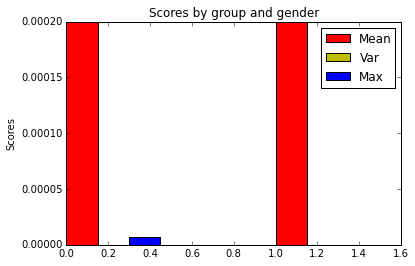

In [78]:
N = 3
print var
ind = np.arange(2)  # the x locations for the groups
width = 0.15      # the width of the bars

var1 = [var[0],var[3]]
var2 = [var[1],var[4]]
var3 = [var[2],var[5]]

fig, ax = plt.subplots()
rects1 = ax.bar(ind, var1, width, color='r')
rects2 = ax.bar(ind + width, var2, width, color='y')
rects3 = ax.bar(ind + 2*width, var3, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
plt.ylim([0,0.0002])

ax.legend((rects1[0], rects2[0], rects3[0]), ('Mean', 'Var','Max'))


plt.show()

### 1B. PageRank

Mplex :  0
0/820 
250/820 
500/820 
750/820 


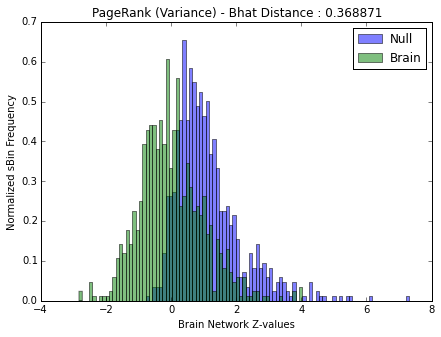

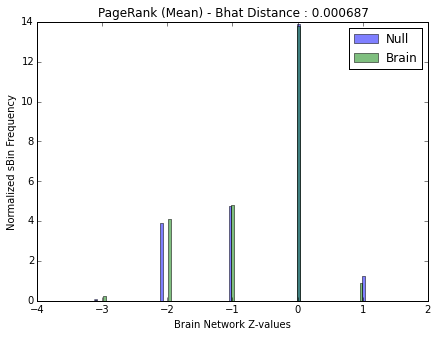

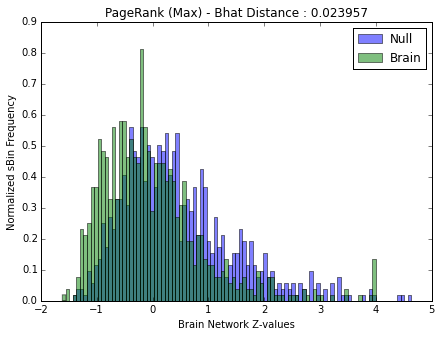

Mplex :  1
0/820 
250/820 
500/820 
750/820 


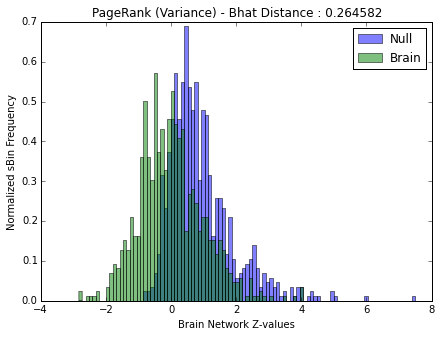

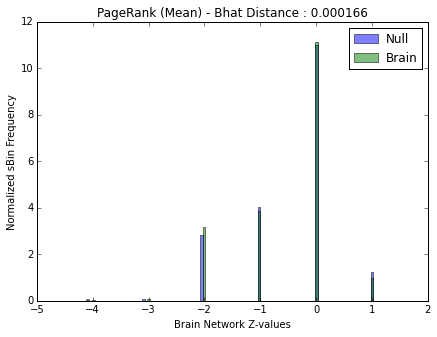

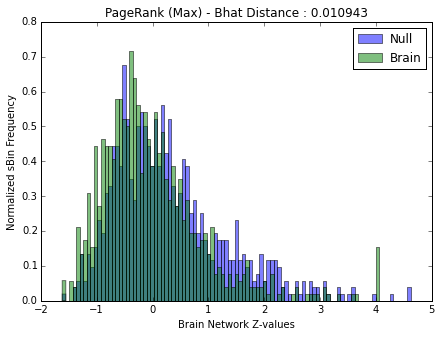

Mplex :  2
0/820 
250/820 
500/820 
750/820 


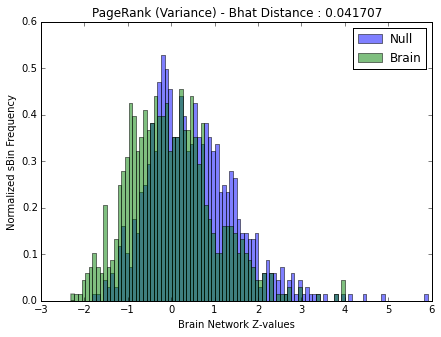

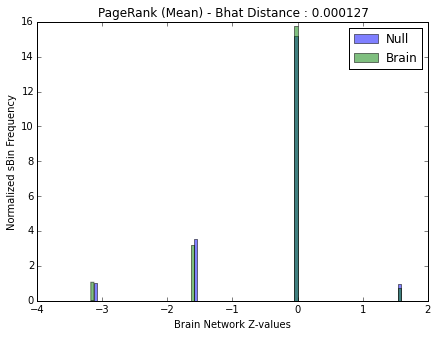

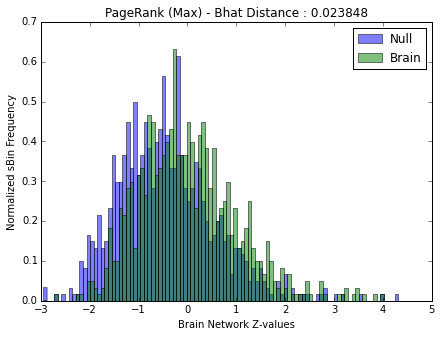

Mplex :  3
0/820 
250/820 
500/820 
750/820 


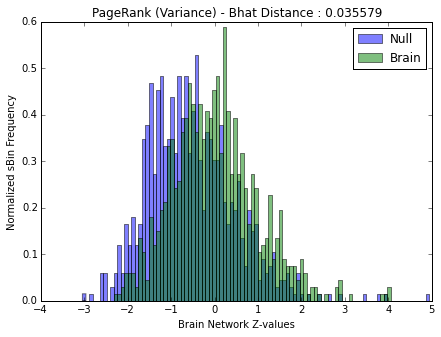

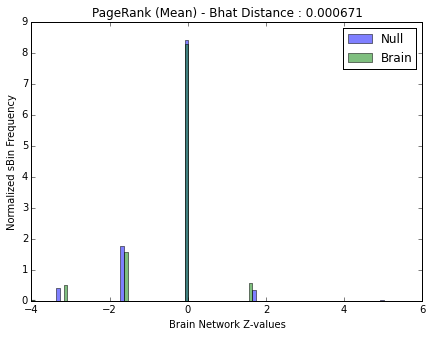

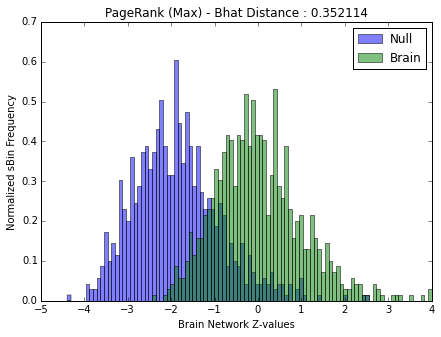

In [18]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.pagerank_centrality(net,0.85)
        btwn_null = bct.pagerank_centrality(null,0.85)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    plot_hist(nb,['PageRank (Variance)','PageRank (Mean)', 'PageRank (Max)'])
            

### 1C. Eigenvector Centrality

Mplex :  0
0/820 
250/820 
500/820 
750/820 


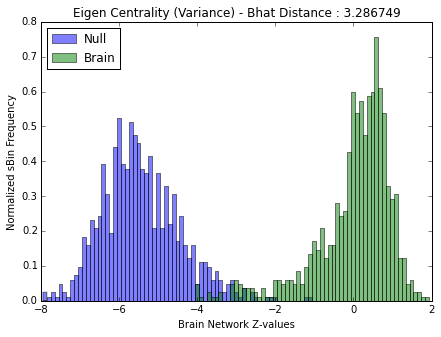

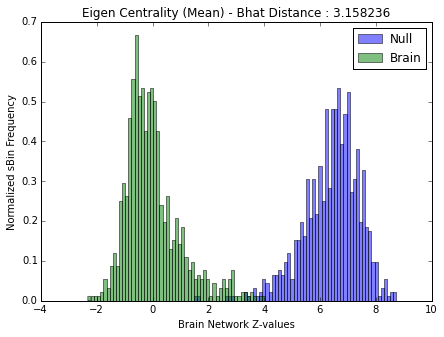

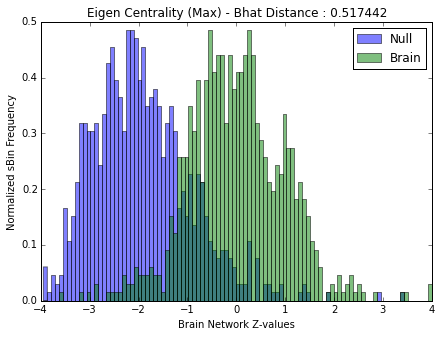

Mplex :  1
0/820 
250/820 
500/820 
750/820 


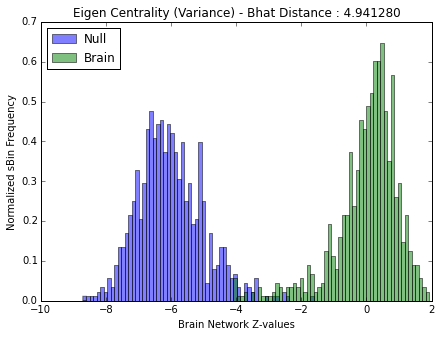

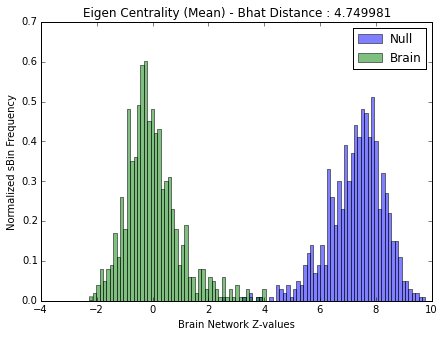

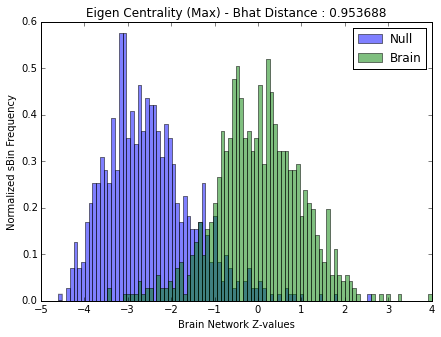

Mplex :  2
0/820 
250/820 
500/820 
750/820 


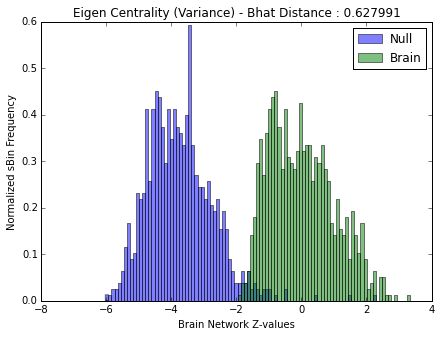

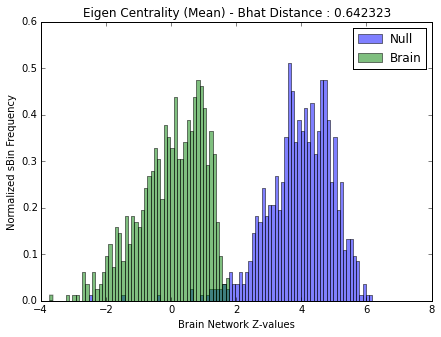

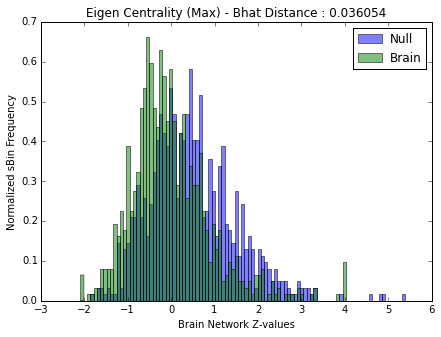

Mplex :  3
0/820 
250/820 
500/820 
750/820 


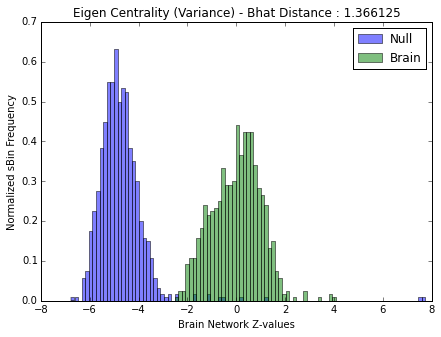

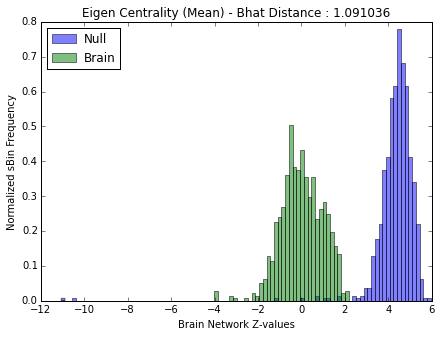

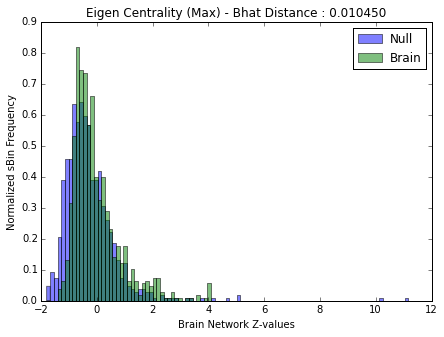

In [19]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.eigenvector_centrality_und(net)
        btwn_null = bct.eigenvector_centrality_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    plot_hist(nb,['Eigen Centrality (Variance)','Eigen Centrality (Mean)', 'Eigen Centrality (Max)'])

## 2. Clustering

### 2A. Clustering Coefficienct

In [9]:
%matplotlib inline
var = []
varnull = []
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]   
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn = bct.clustering_coef_bu(net)
        btwn_null = bct.clustering_coef_bu(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    var.append(np.var(nb[1,:,0]))
    varnull.append(np.var(nb[1,:,1]))
    #plot_hist(nb,['Clustering Coef (Variance)','Clustering Coef (Mean)', 'Clustering Coef (Max)'])
print var
print varnull

Mplex :  0
0/820 
250/820 
500/820 
750/820 
Mplex :  1
0/820 
250/820 
500/820 
750/820 
Mplex :  2
0/820 
250/820 
500/820 
750/820 
Mplex :  3
0/820 
250/820 
500/820 
750/820 
[0.0003546567584215735, 0.0093815727261312692, 5.9257039128413798e-05, 0.001826009429267662]
[0.0001218310292383097, 0.0020746806958465329, 3.8871920071539391e-05, 0.00099964198212490387]


In [53]:
mplex1 = np.load('/Users/nick/desktop/mplex/data/mplex300.npy') # shape = (820,300,300) # not normalized
for i in range(820):
    mplex1[i,:,:] = (mplex1[i,:,:] - np.mean(mplex1[i,:,:]))/np.std(mplex1[i,:,:])
    np.fill_diagonal(mplex1[i,:,:],0)

mp1 = mplex1.copy()
mp1[mp1 < 0] = 0
mp1n = gen_null(mp1)
print 'next'
mp2 = mplex1.copy()
mp2[mp2 < 0.75] = 0
mp2n = gen_null(mp2)
print 'next'

mp3 = mplex1.copy()
mp3[mp2 < 1.5] = 0
mp3n = gen_null(mp3)
print 'next'

mp4 = mplex1.copy()
mp4[mp2 < 2.25] = 0
mp4n = gen_null(mp4)
print 'next'

mp5 = mplex1.copy()
mp5[mp2 < 3] = 0
mp5n = gen_null(mp5)
print 'next'

mplist = [mp1,mp2,mp3,mp4,mp5]
mplistnull = [mp1n,mp2n,mp3n,mp4n,mp5n]

0/820
10/820
20/820
30/820


KeyboardInterrupt: 

In [48]:
var = []
#varnull = []
for m in range(5):
    print m
    mp = mplist[m]
    mpnull = mplistnull[m]
    tmp = []
    tmpnull = []
    for n in range(820):
        if n % 150 == 0: print n
        #print n
        net = mp[n,:,:]
        null = mpnull[n,:,:]
        btwn = bct.clustering_coef_bu(net)
        tmp.append(btwn)
        btwn_null = bct.clustering_coef_bu(null)
        tmpnull.append(btwn_null)
    print np.var(tmp)
    print np.var(tmpnull)
    var.append(np.var(tmp))
    varnull.append(np.var(tmpnull))



0
0
150
300
450


KeyboardInterrupt: 

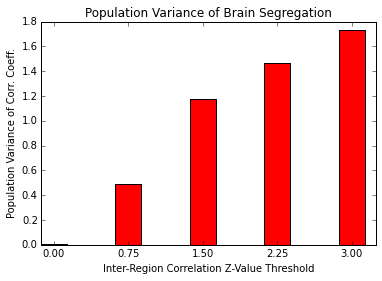

In [45]:
N = 5
brainstd = var

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, brainstd, width, color='r')

#randomstd = varnull
#rects2 = ax.bar(ind + width, randomstd, width, color='y')



#ax.legend((rects1[0], rects2[0]), ('Brain', 'Null Model'))

plt.xlabel('Inter-Region Correlation Z-Value Threshold')
plt.ylabel('Population Variance of Corr. Coeff.')
plt.title('Population Variance of Brain Segregation')
ax.set_xticks(ind+width/2)
ax.set_xticklabels(('0.00', '0.75', '1.50', '2.25', '3.00'))
plt.show()

### 2B. Transitivity

Mplex :  0
0/820 
250/820 
500/820 
750/820 


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


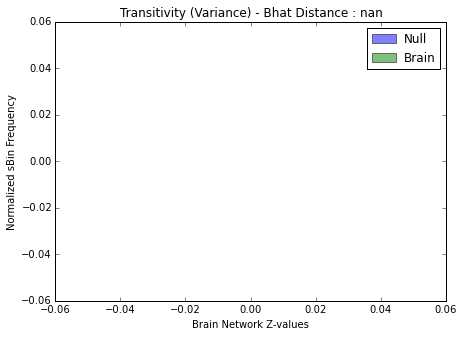

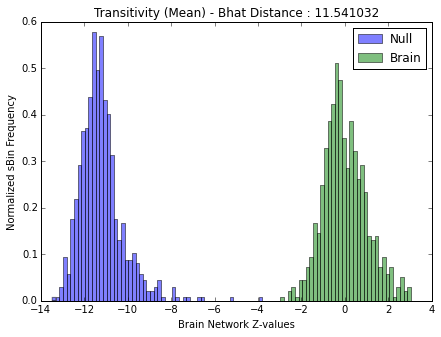

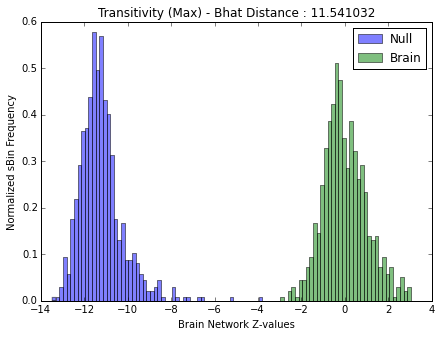

Mplex :  1
0/820 
250/820 
500/820 
750/820 


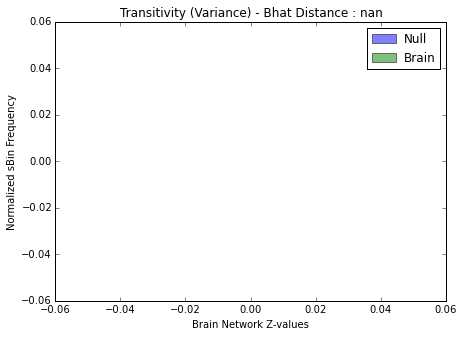

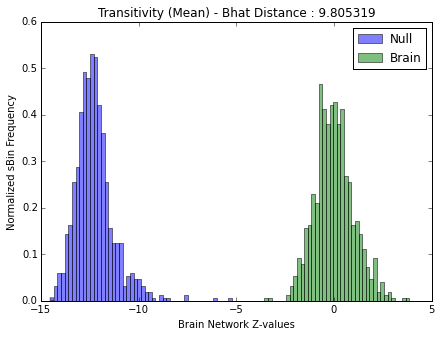

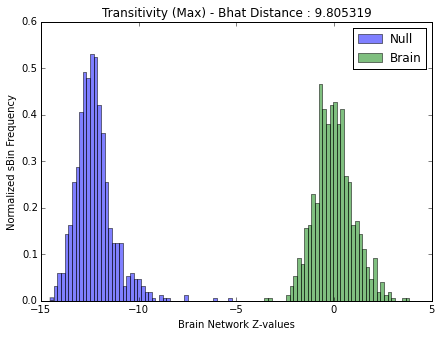

Mplex :  2
0/820 
250/820 
500/820 
750/820 


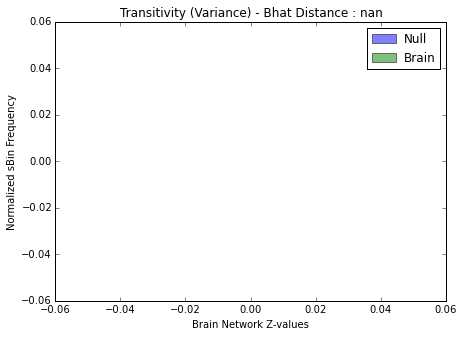

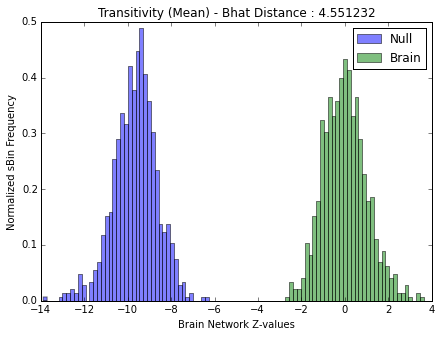

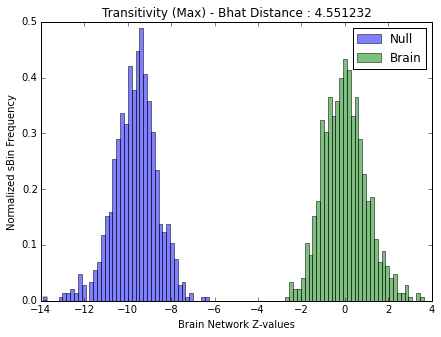

Mplex :  3
0/820 
250/820 
500/820 
750/820 


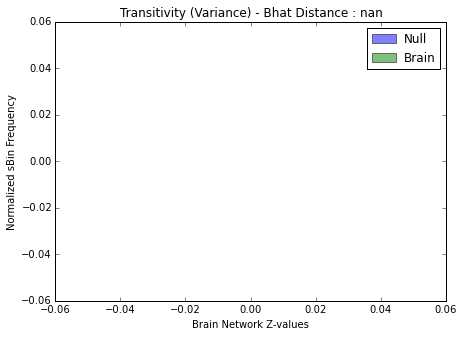

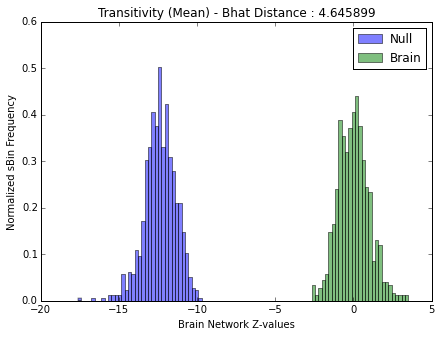

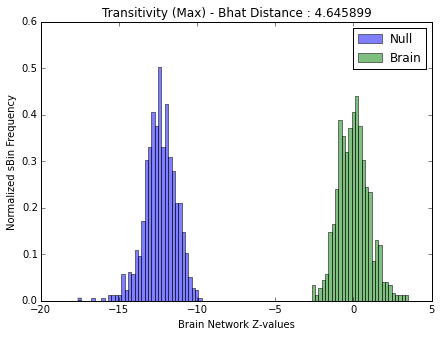

In [21]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.transitivity_bu(net)
            btwn_null = bct.transitivity_bu(null)
        else:
            btwn = bct.transitivity_wu(net)
            btwn_null = bct.transitivity_wu(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    plot_hist(nb,['Transitivity (Variance)','Transitivity (Mean)', 'Transitivity (Max)'])

## 3. Core

### 3A. Assortativity

Mplex :  0
0/820 
250/820 
500/820 
750/820 


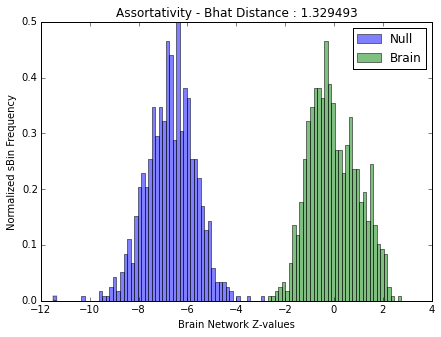

Mplex :  1
0/820 
250/820 
500/820 
750/820 


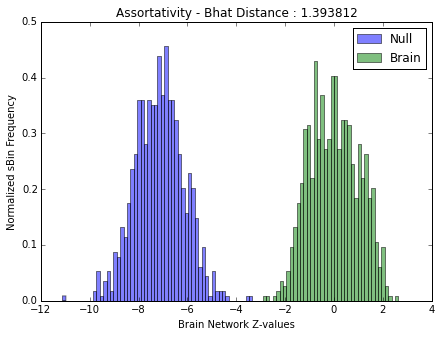

Mplex :  2
0/820 
250/820 
500/820 
750/820 


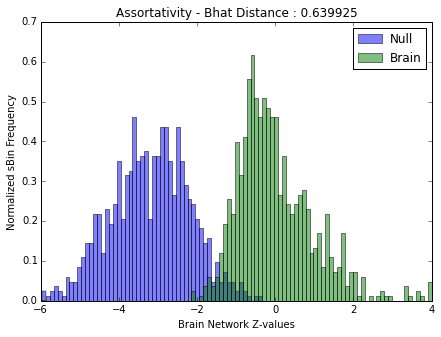

Mplex :  3
0/820 
250/820 
500/820 
750/820 


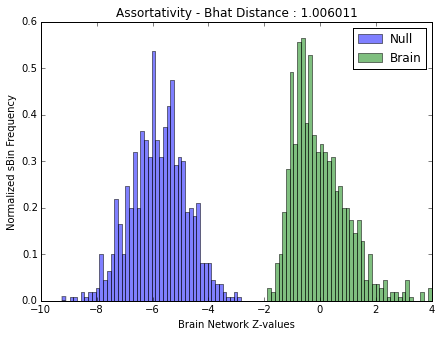

In [22]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.assortativity_bin(net,0)
            btwn_null = bct.assortativity_bin(null,0)
        else:
            btwn = bct.assortativity_wei(net,0)
            btwn_null = bct.assortativity_wei(null,0)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
    plot_hist(nb,['Assortativity'])

### 3B. Rich Club

Mplex :  0
0/820 
250/820 
500/820 
750/820 


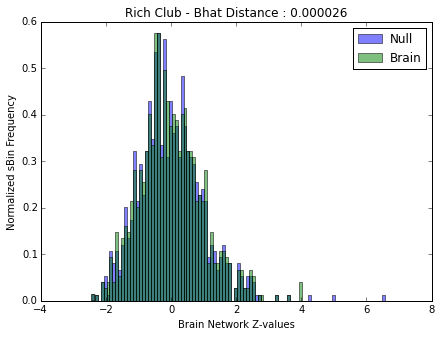

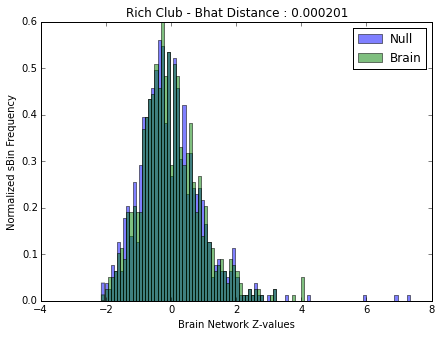

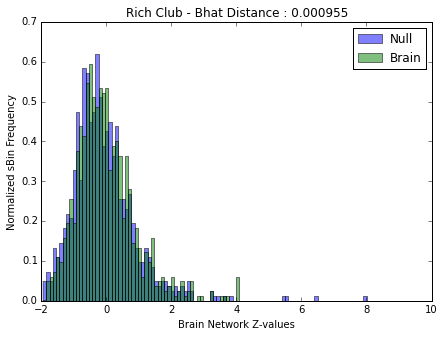

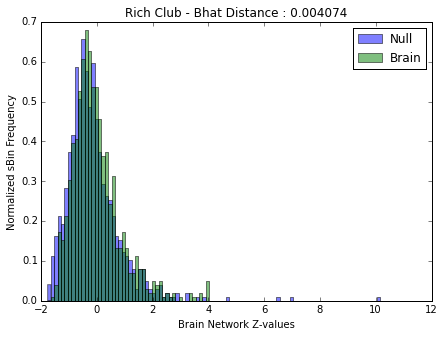

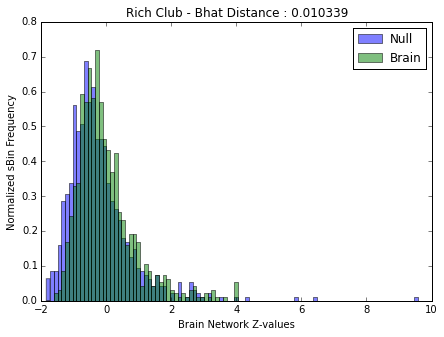

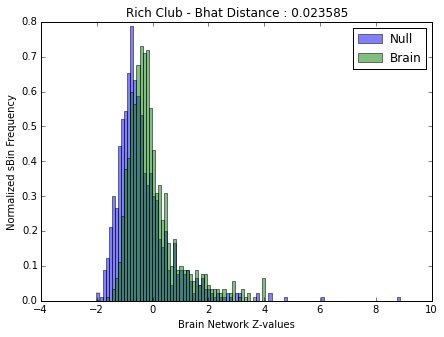

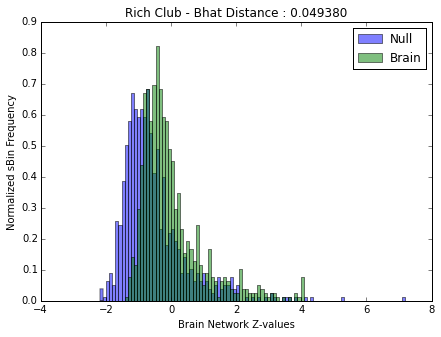

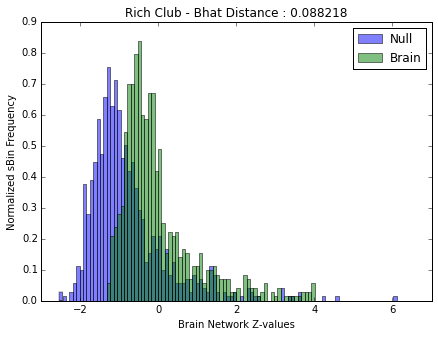

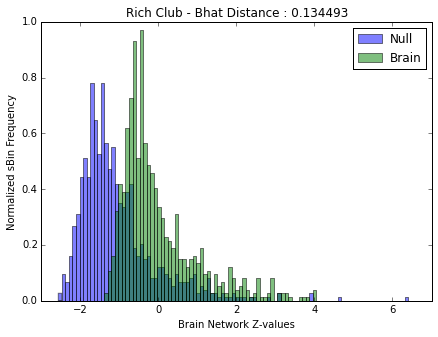

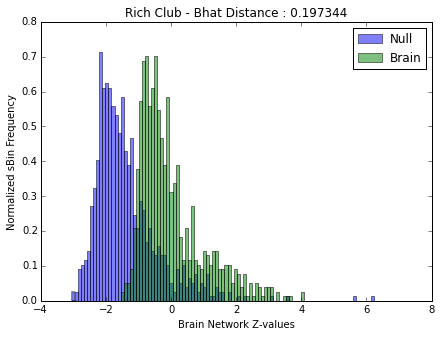

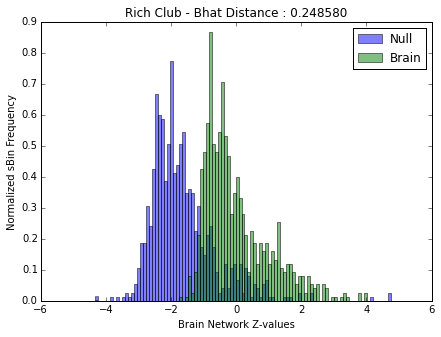

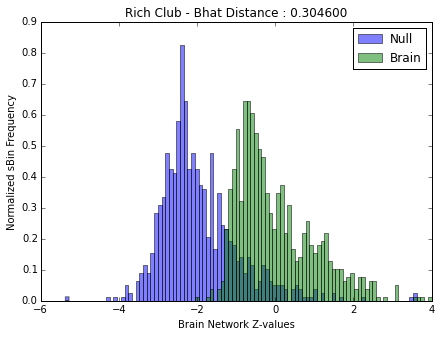

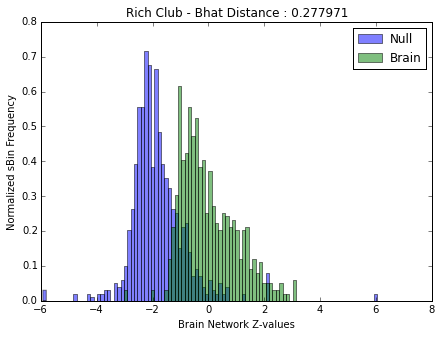

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater


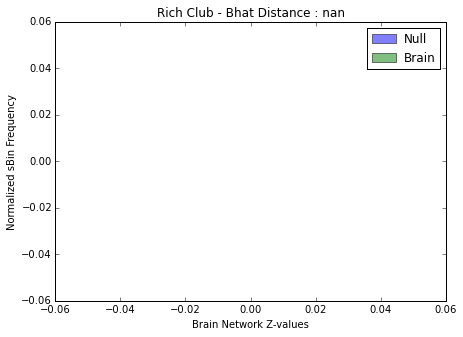

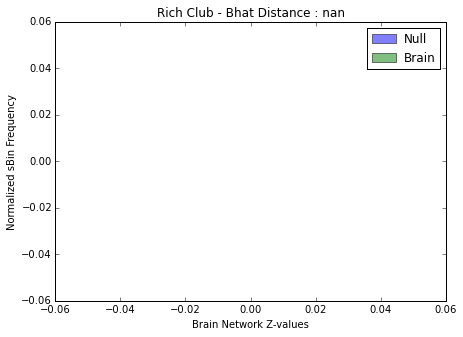

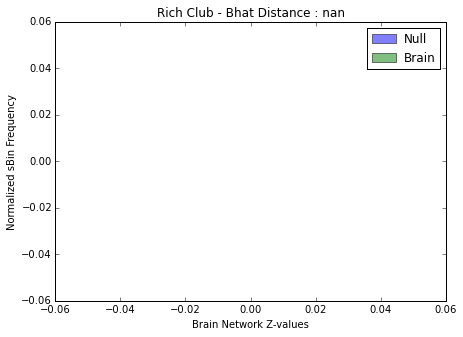

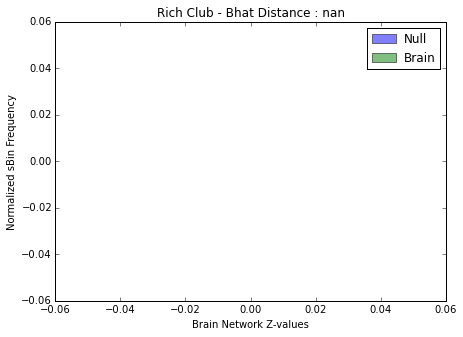

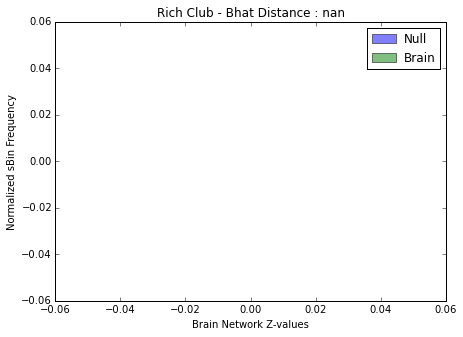

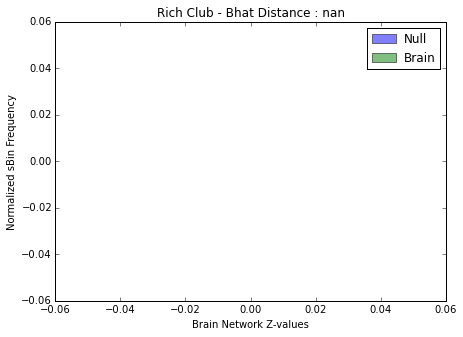

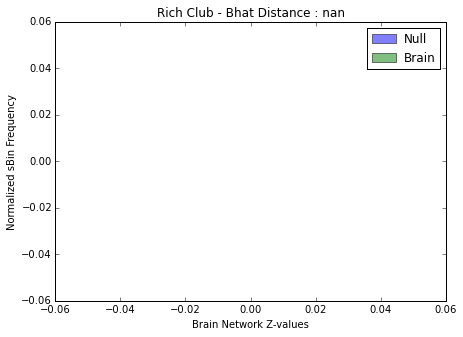

Mplex :  1
0/820 
250/820 
500/820 
750/820 


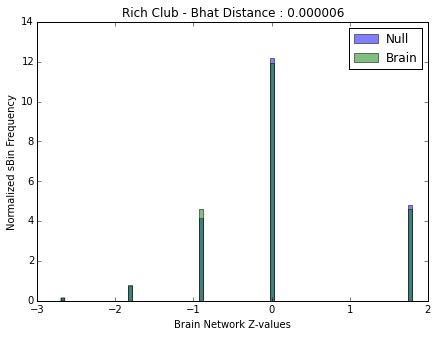

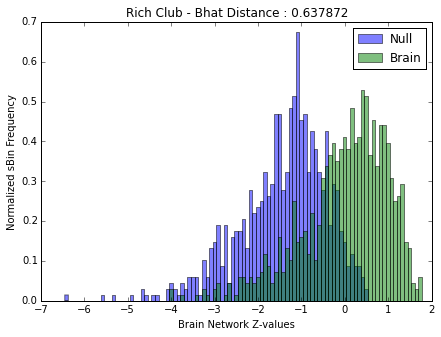

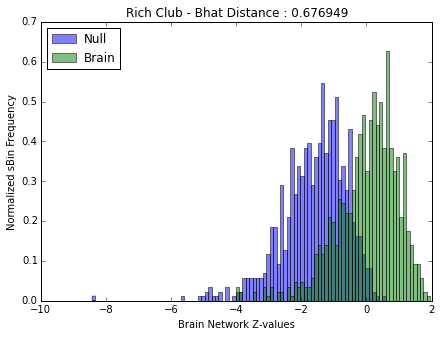

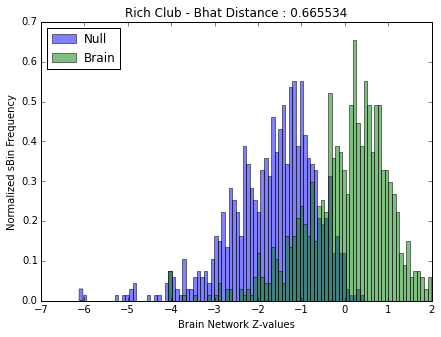

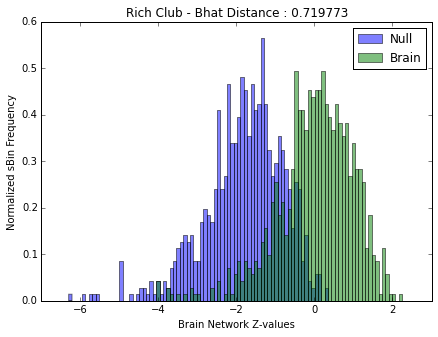

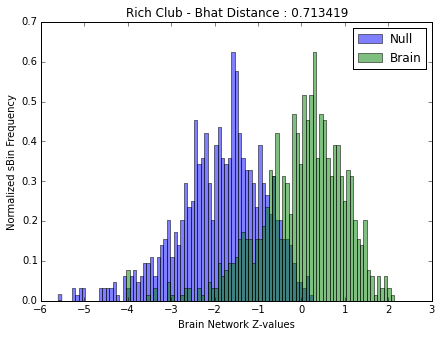

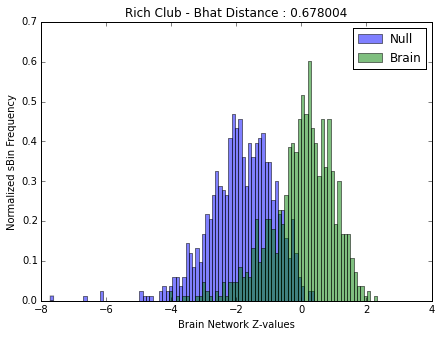

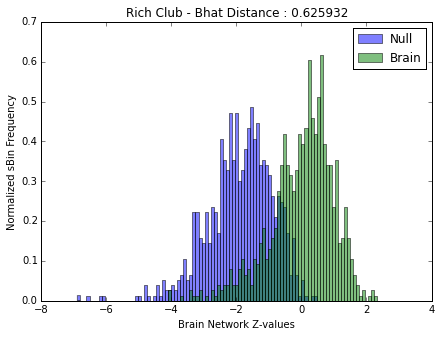

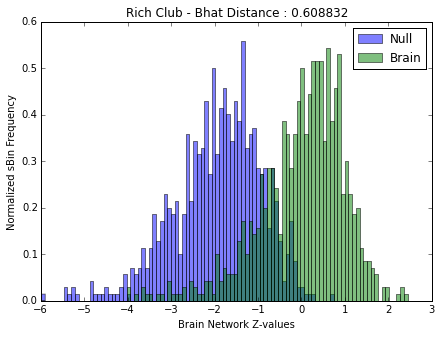

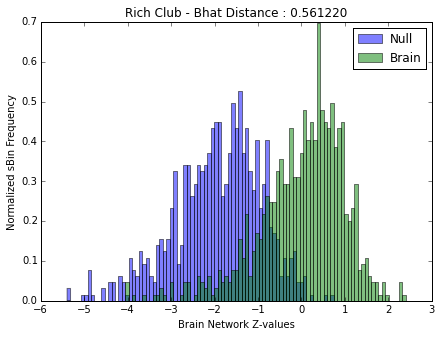

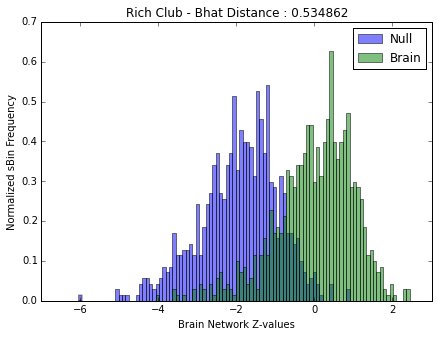

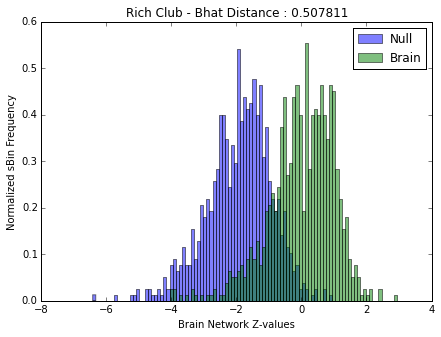

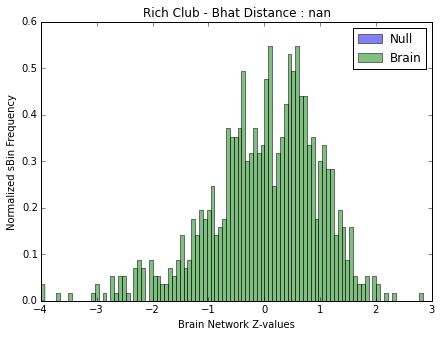

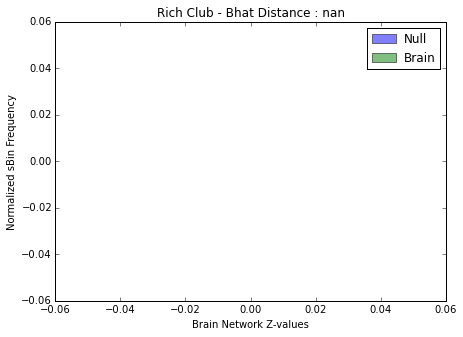

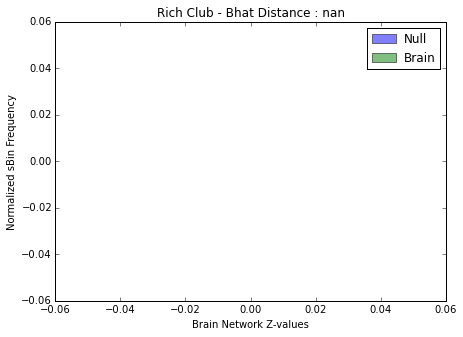

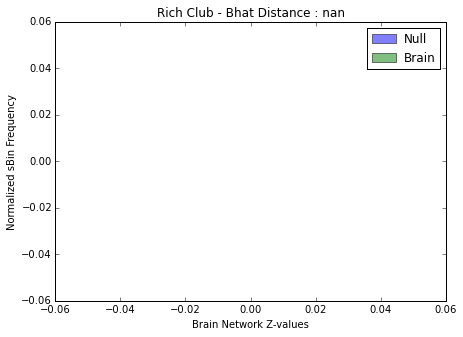

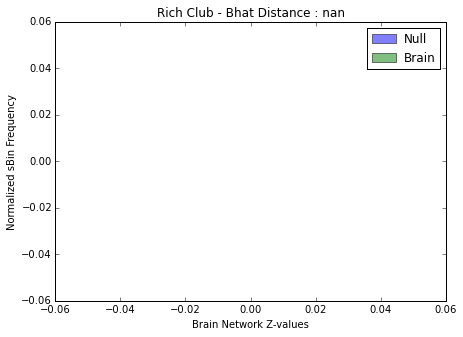

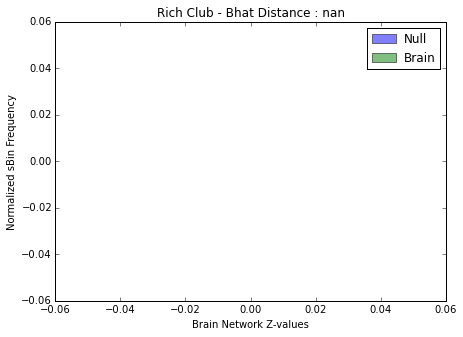

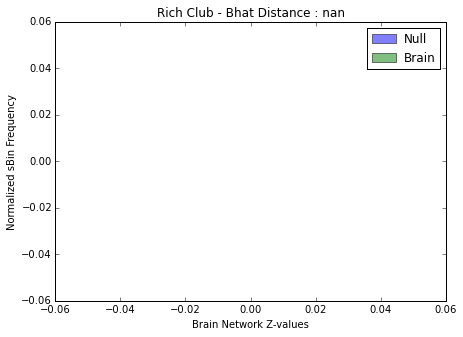

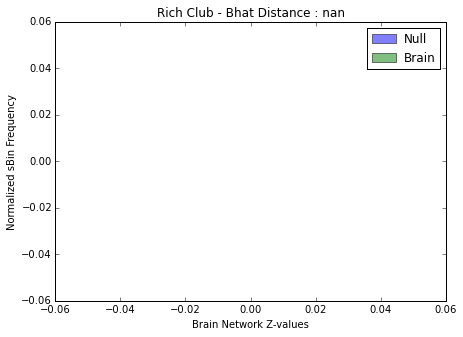

Mplex :  2
0/820 
250/820 
500/820 
750/820 


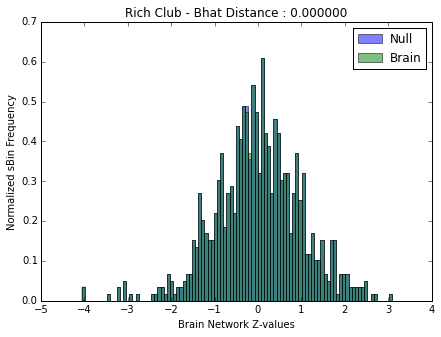

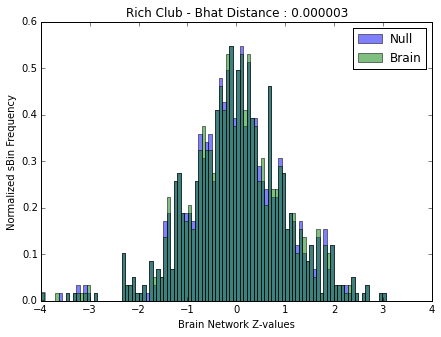

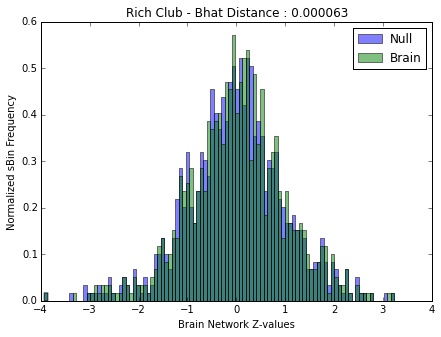

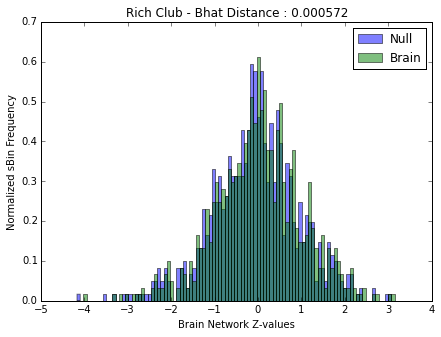

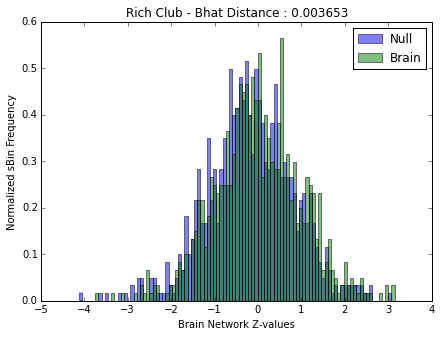

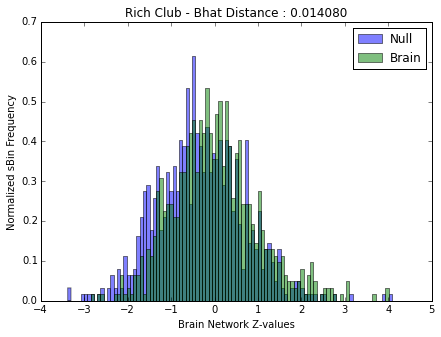

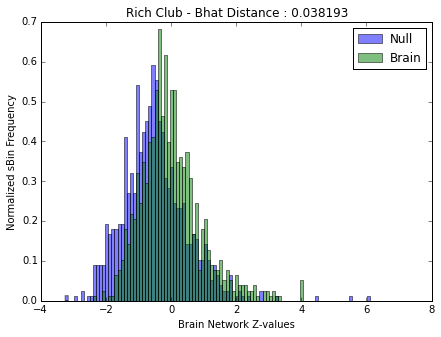

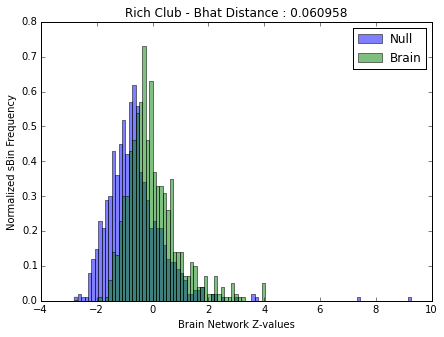

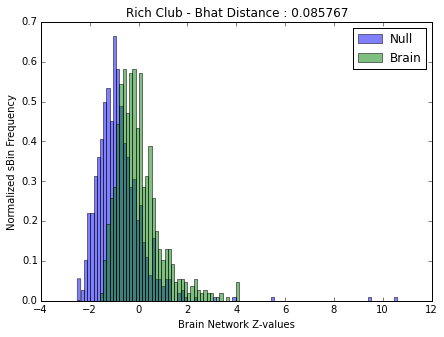

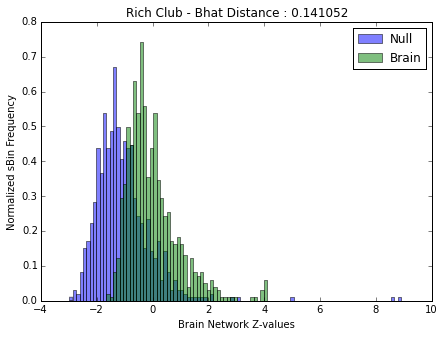

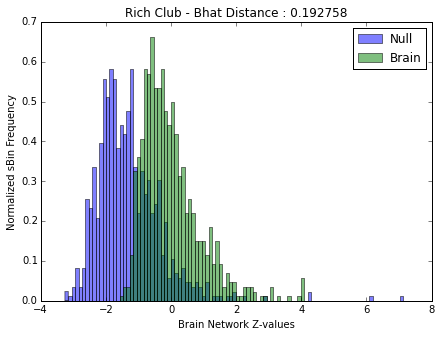

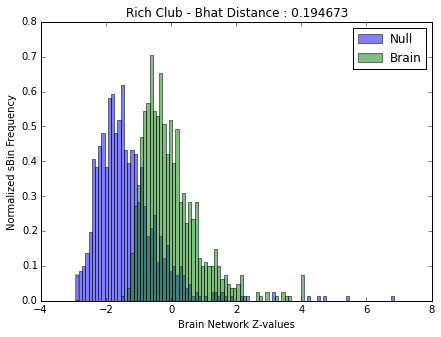

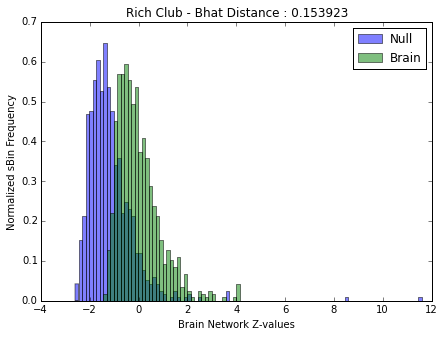

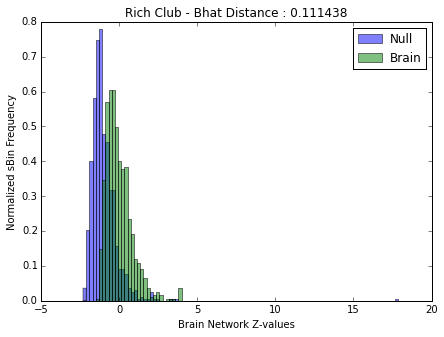

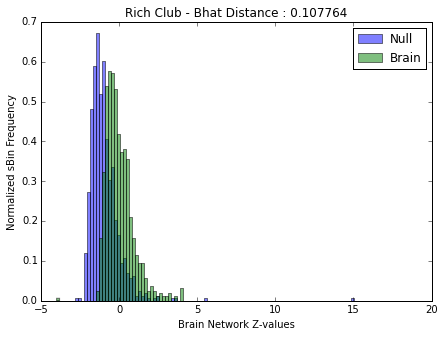

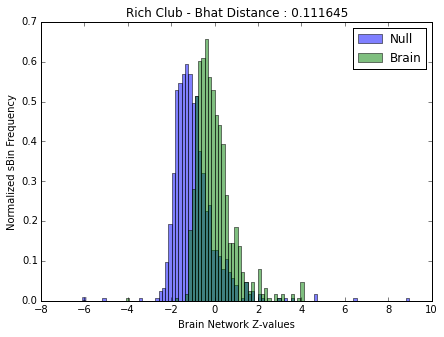

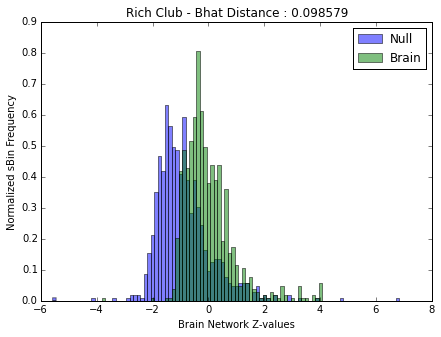

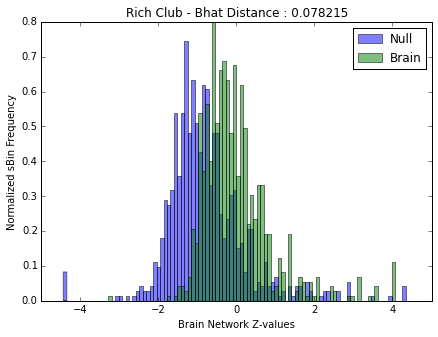

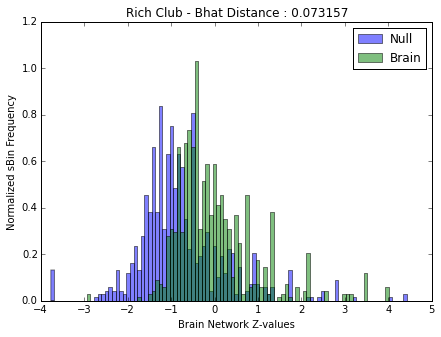

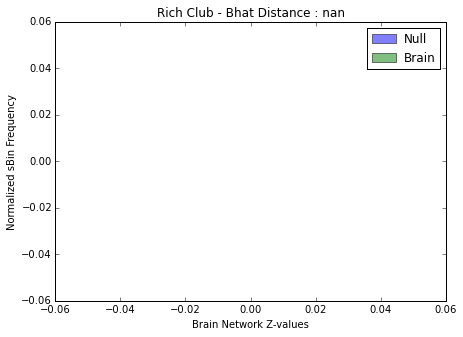

Mplex :  3
0/820 
250/820 
500/820 
750/820 


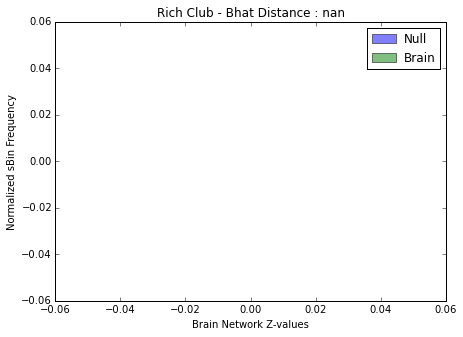

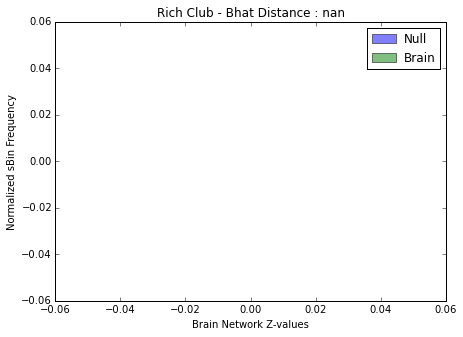

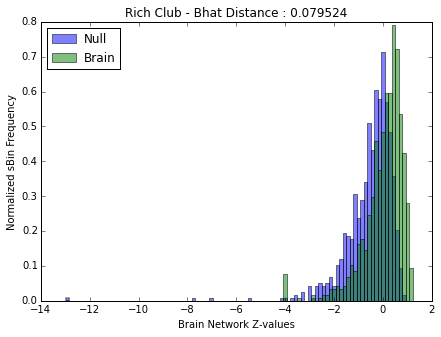

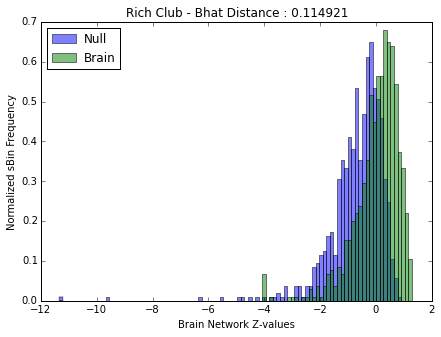

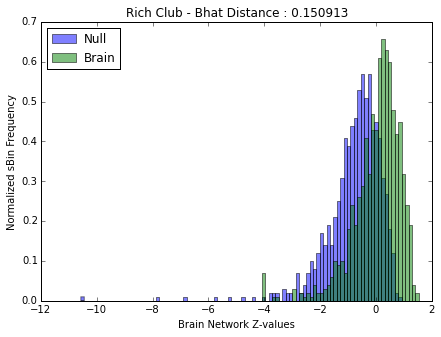

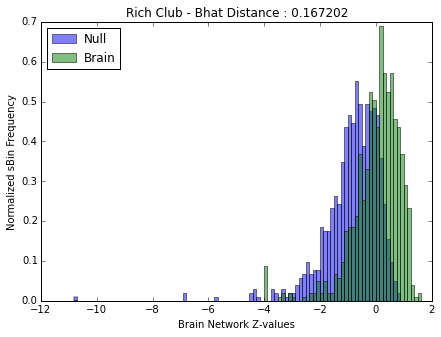

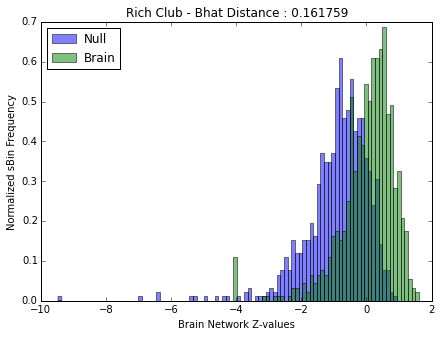

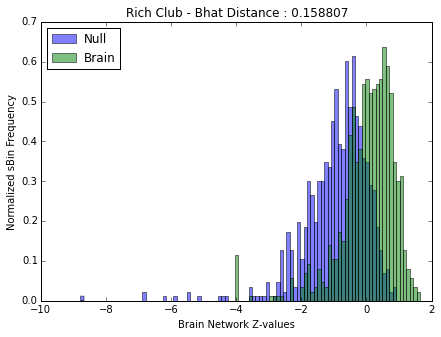

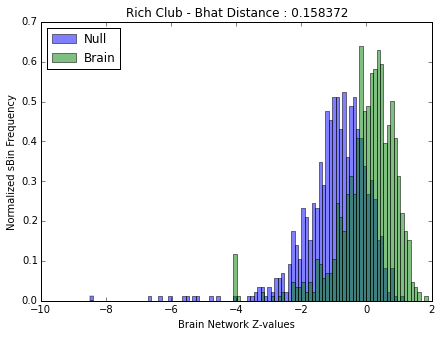

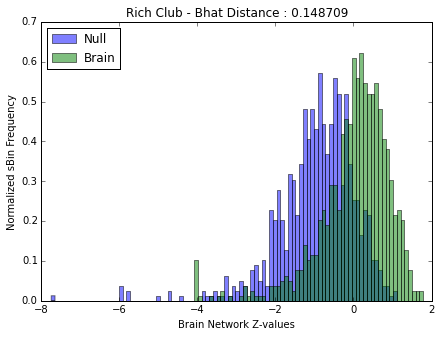

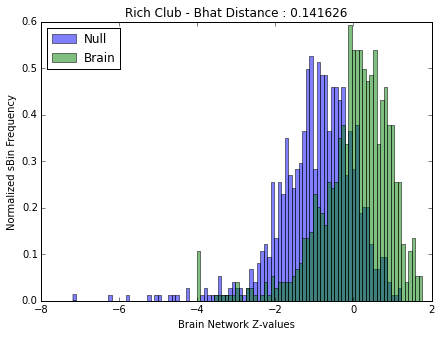

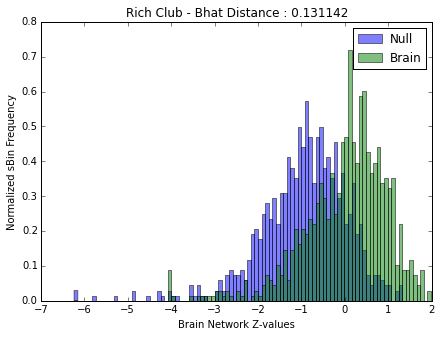

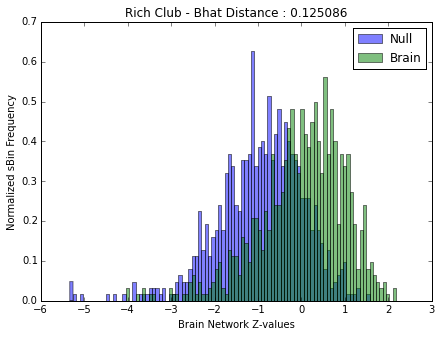

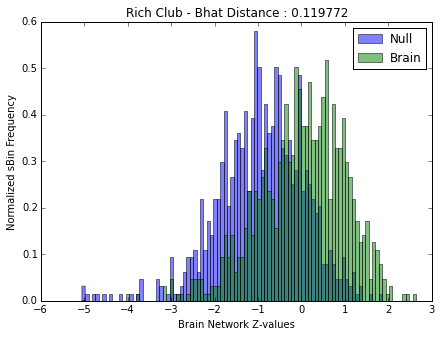

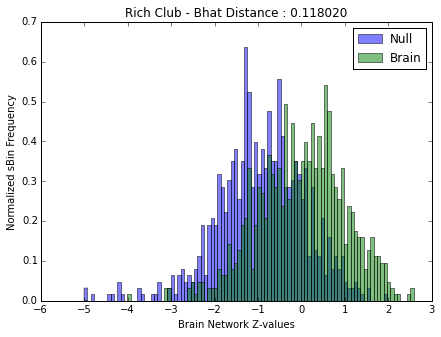

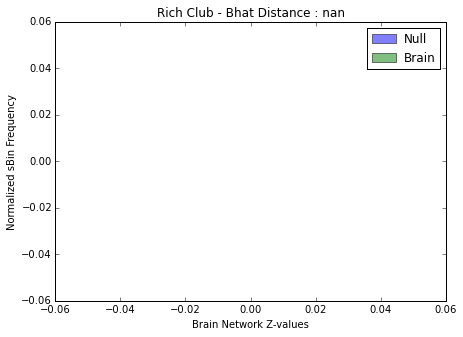

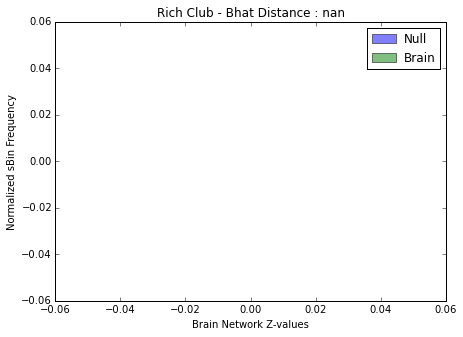

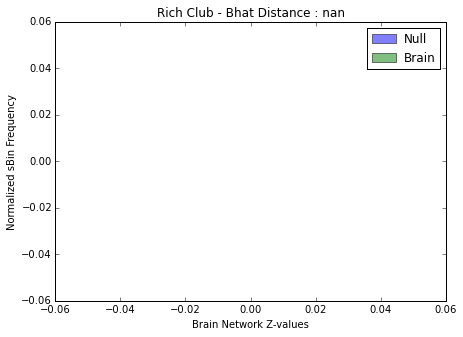

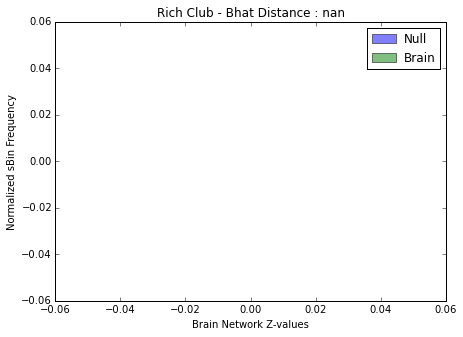

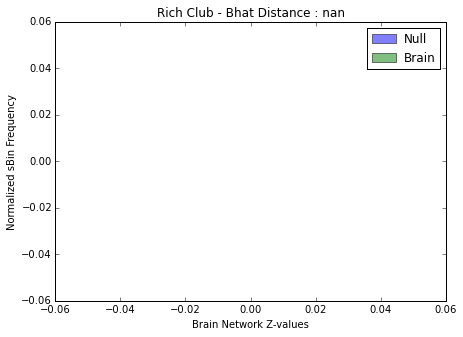

In [23]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((20,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx == 0 or mp_idx == 2:
            btwn,_,_ = bct.rich_club_bu(net,20)
            btwn_null,_,_ = bct.rich_club_bu(null,20)
        else:
            btwn = bct.rich_club_wu(net,20)
            btwn_null = bct.rich_club_wu(null,20)
        for ii in range(20):
            nb[ii,net_idx,0] = btwn[ii]
            nb[ii,net_idx,1] = btwn_null[ii]
    plot_hist(nb,['Rich Club']*20)

## 4. Degree

Mplex :  0
0/820 
250/820 
500/820 
750/820 


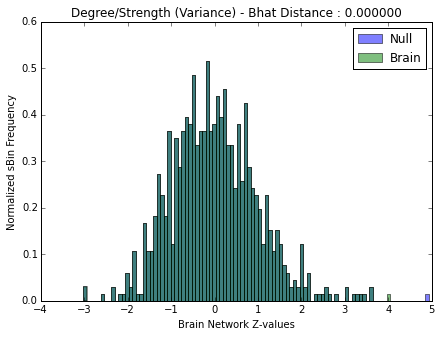

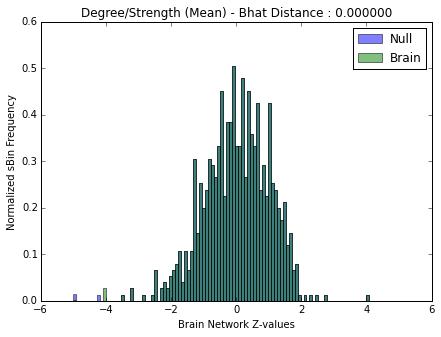

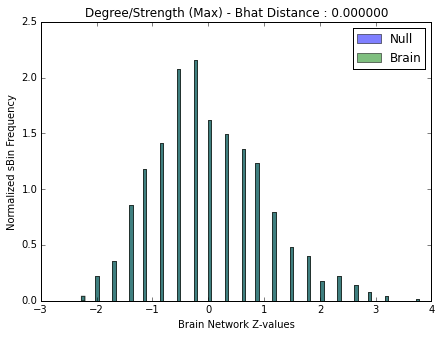

Mplex :  1
0/820 
250/820 
500/820 
750/820 


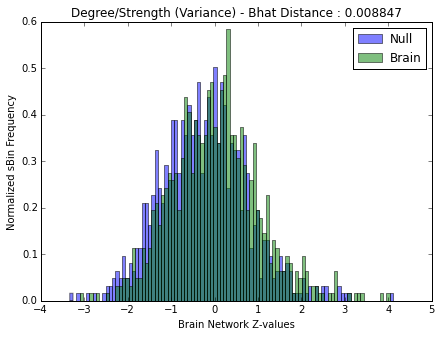

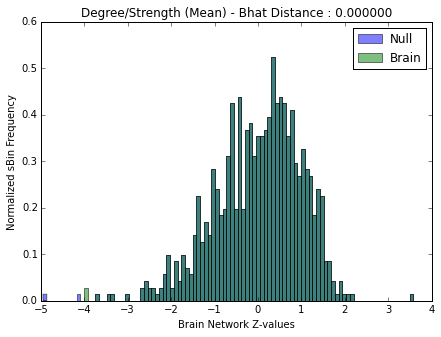

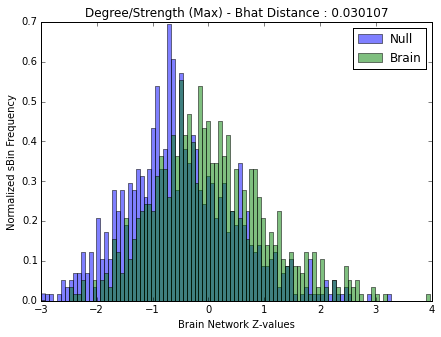

Mplex :  2
0/820 
250/820 
500/820 
750/820 


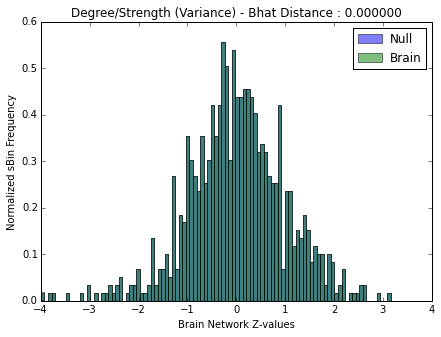

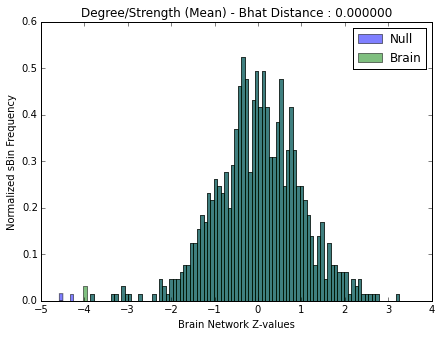

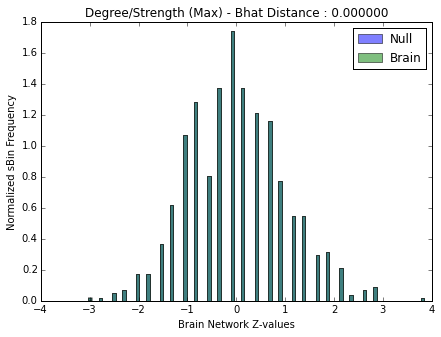

Mplex :  3
0/820 
250/820 
500/820 
750/820 


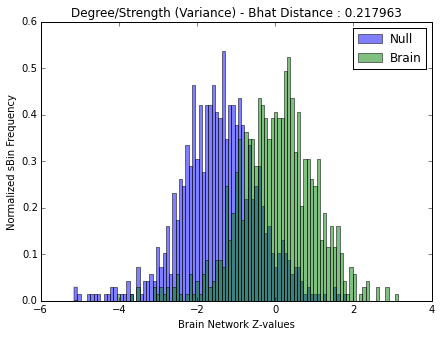

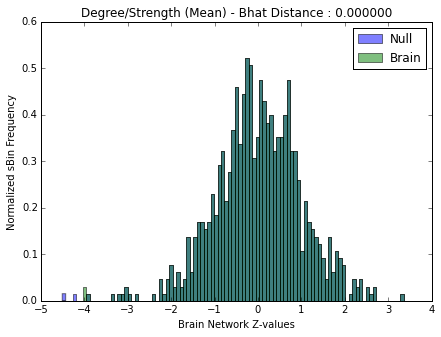

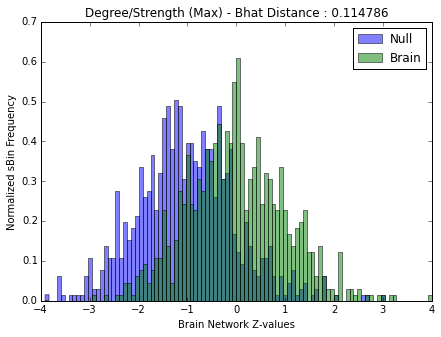

In [24]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        if mp_idx==0 or mp_idx==2:
            btwn = bct.degrees_und(net)
            btwn_null = bct.degrees_und(null)
        else:
            btwn = bct.strengths_und(net)
            btwn_null = bct.strengths_und(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    plot_hist(nb,['Degree/Strength (Variance)','Degree/Strength (Mean)', 'Degree/Strength (Max)'])

## 5. Distance

### 5A. Characteristic Path Length

Mplex :  0
0/820 
250/820 
500/820 
750/820 


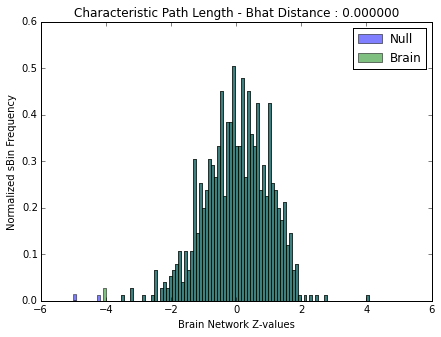

Mplex :  1
0/820 
250/820 
500/820 
750/820 


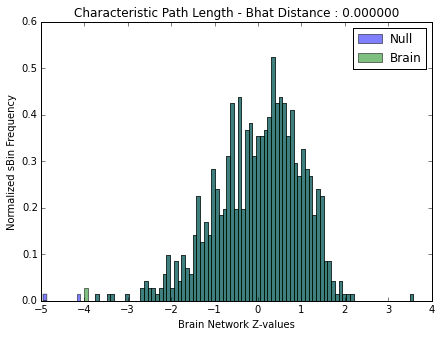

Mplex :  2
0/820 
250/820 
500/820 
750/820 


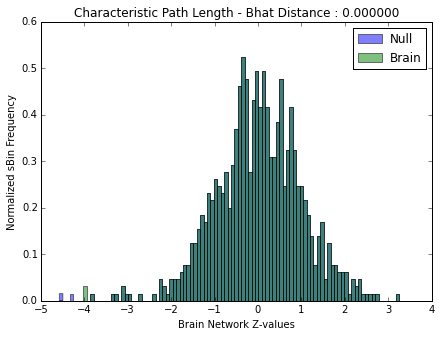

Mplex :  3
0/820 
250/820 
500/820 
750/820 


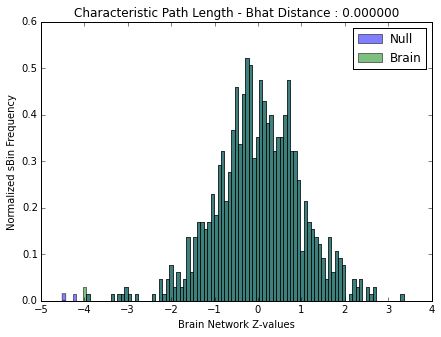

In [25]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn,_,_,_,_ = bct.charpath(net+1e-7)
        btwn_null,_,_,_,_ = bct.charpath(null+1e-7)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
    plot_hist(nb,['Characteristic Path Length'])

### 5B. Efficiency from CharPath

Mplex :  0
0/820 
250/820 
500/820 
750/820 


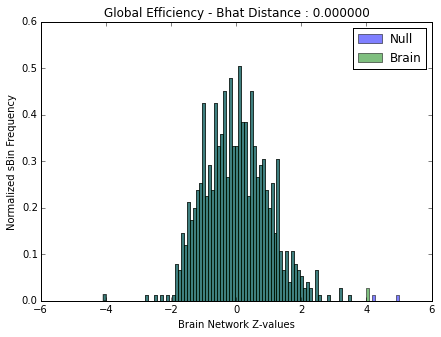

Mplex :  1
0/820 
250/820 
500/820 
750/820 


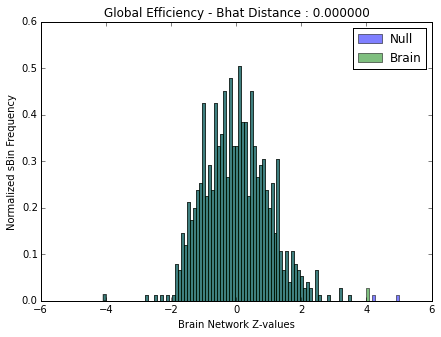

Mplex :  2
0/820 
250/820 
500/820 
750/820 


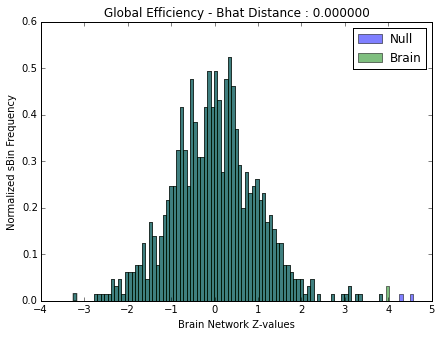

Mplex :  3
0/820 
250/820 
500/820 
750/820 


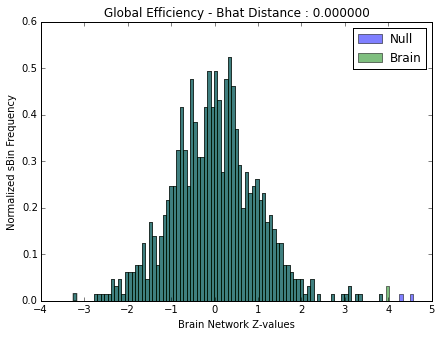

In [26]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,btwn,_,_,_ = bct.charpath(net+1e-7)
        _,btwn_null,_,_,_ = bct.charpath(null+1e-7)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
    plot_hist(nb,['Global Efficiency'])

### 5C. Global Efficiency

Mplex :  0
0/820 
250/820 
500/820 
750/820 


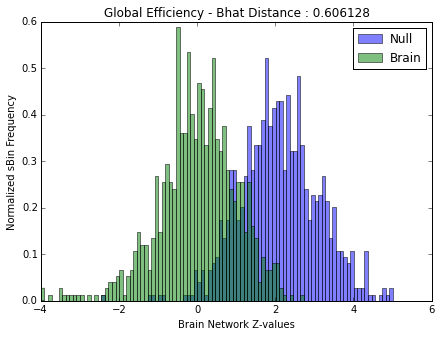

Mplex :  1
0/820 
250/820 
500/820 
750/820 


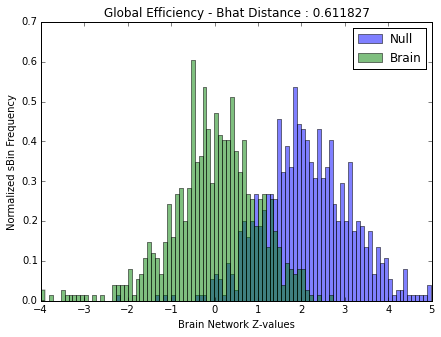

Mplex :  2
0/820 
250/820 
500/820 
750/820 


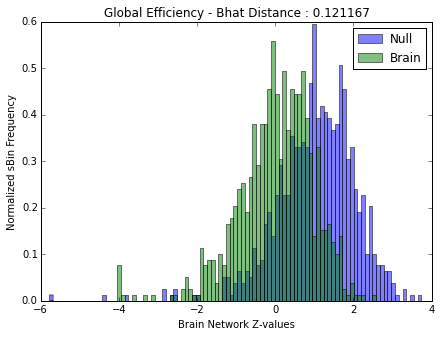

Mplex :  3
0/820 
250/820 
500/820 
750/820 


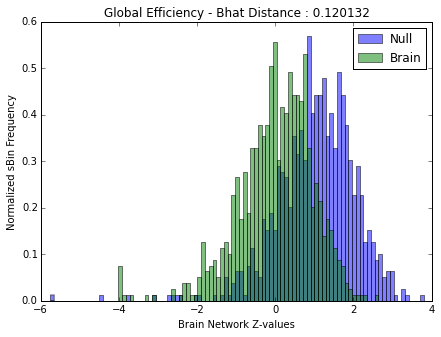

In [27]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((1,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        btwn,_ = bct.efficiency_bin(net)
        btwn_null,_= bct.efficiency_bin(null)
        nb[0,net_idx,0] = btwn
        nb[0,net_idx,1] = btwn_null
    plot_hist(nb,['Global Efficiency'])

### 5D. Local Efficiency 

Mplex :  0
0/820 
250/820 
500/820 
750/820 


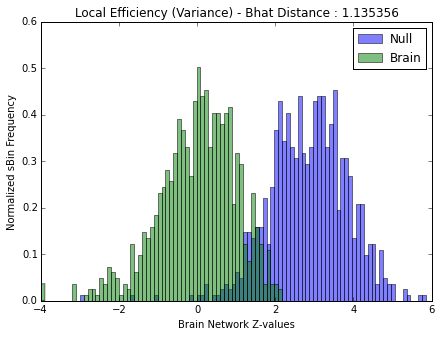

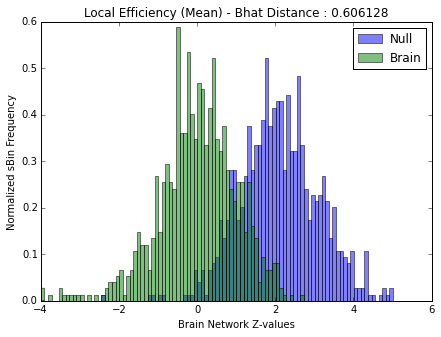

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


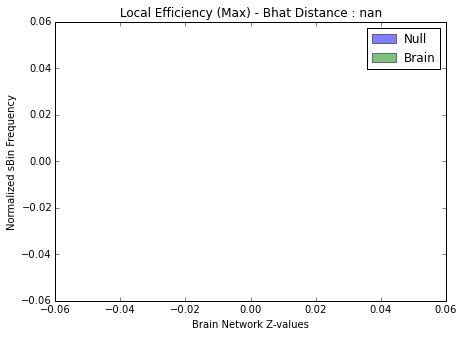

Mplex :  1
0/820 
250/820 
500/820 
750/820 


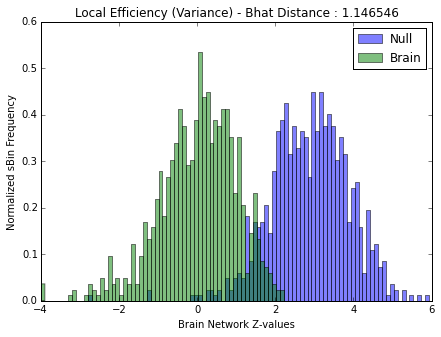

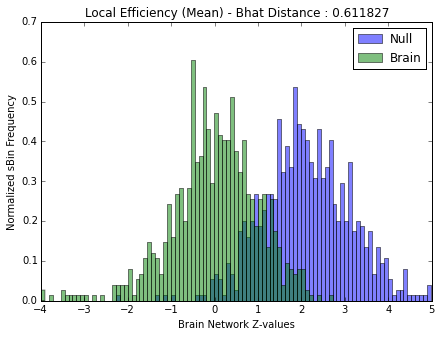

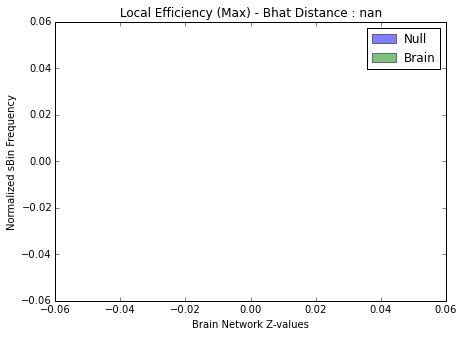

Mplex :  2
0/820 
250/820 
500/820 
750/820 


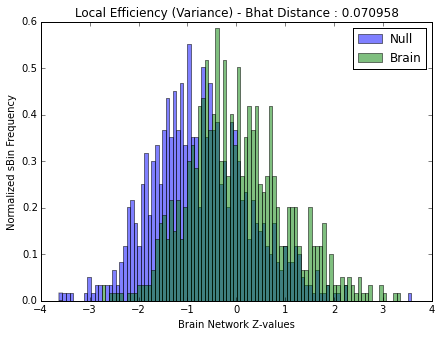

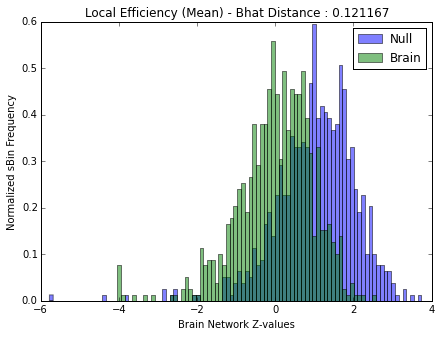

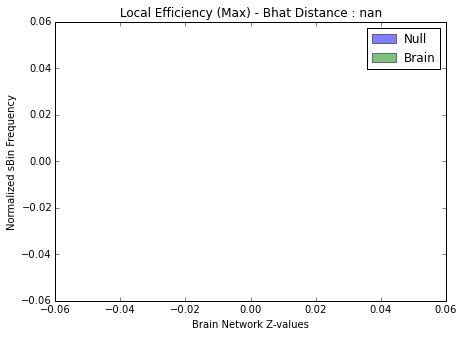

Mplex :  3
0/820 
250/820 
500/820 
750/820 


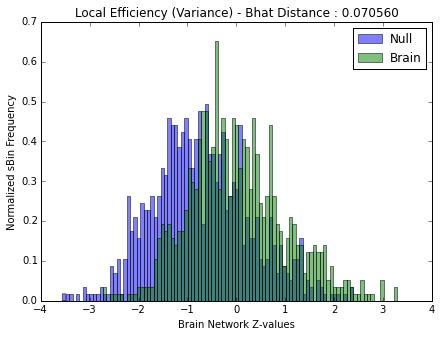

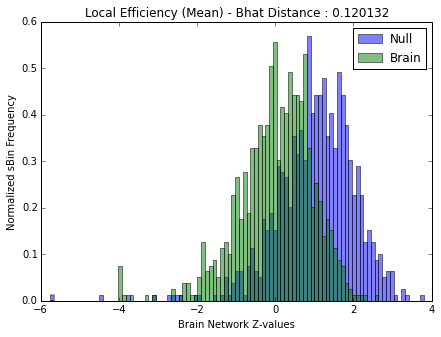

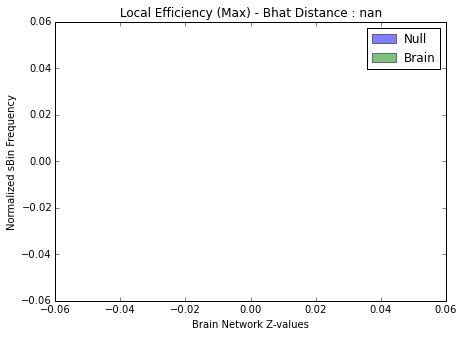

In [28]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,btwn = bct.efficiency_bin(net)
        _,btwn_null = bct.efficiency_bin(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    plot_hist(nb,['Local Efficiency (Variance)','Local Efficiency (Mean)', 'Local Efficiency (Max)'])

### 5E. Eccentricity

Mplex :  0
0/820 


//anaconda/lib/python2.7/site-packages/bctpy-0.4.1-py2.7.egg/bct/algorithms/distance.py:159: RuntimeWarning: divide by zero encountered in true_divide
  D = 1 / D  # invert distance


250/820 
500/820 
750/820 


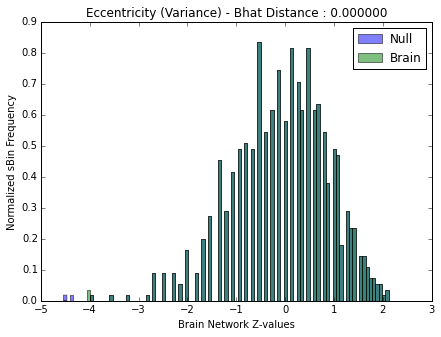

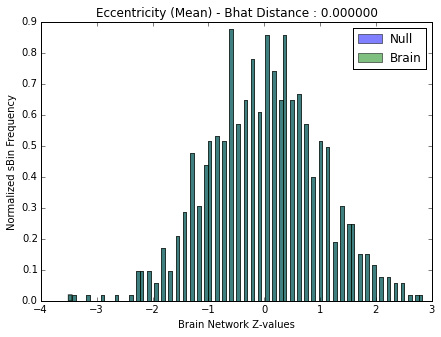

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars


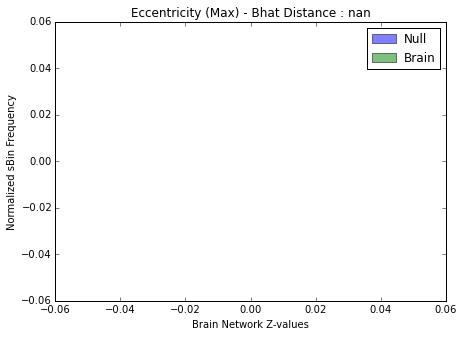

Mplex :  1
0/820 
250/820 
500/820 
750/820 


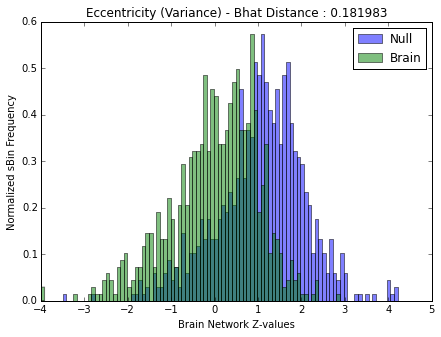

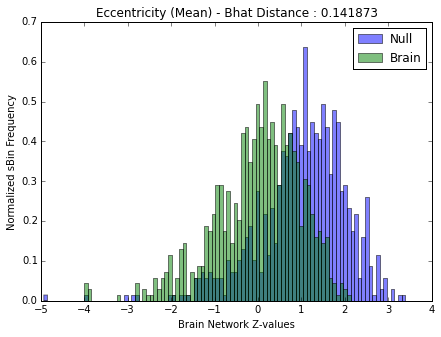

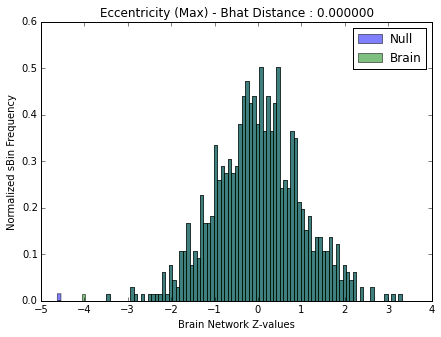

Mplex :  2
0/820 
250/820 
500/820 
750/820 


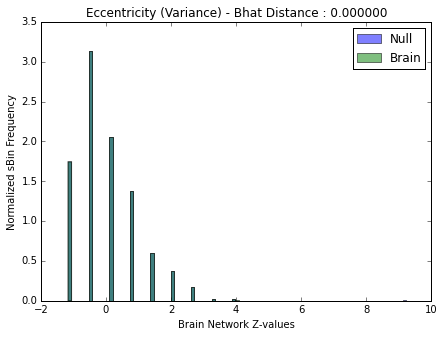

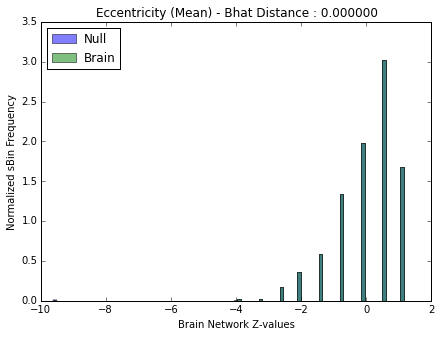

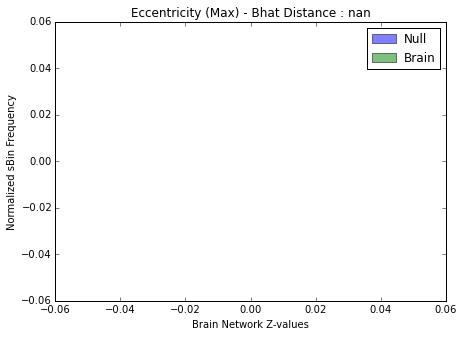

Mplex :  3
0/820 
250/820 
500/820 
750/820 


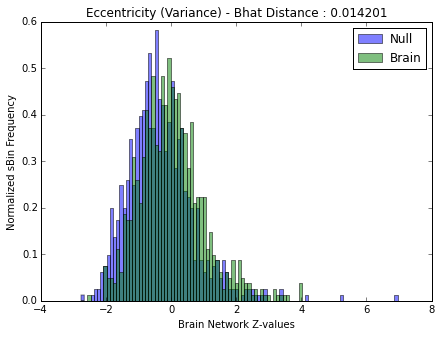

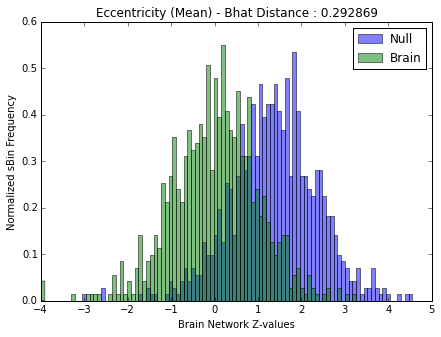

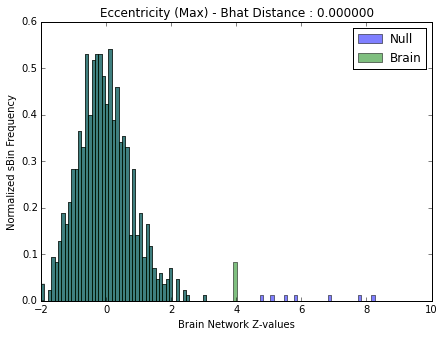

In [29]:
for mp_idx in range(len(mp_list)):
    mplex = mp_list[mp_idx]
    mplex_null = mp_list_null[mp_idx]
    nb = np.empty((3,mplex.shape[0],2))
    print 'Mplex : ' , mp_idx
    for net_idx in range(mplex.shape[0]):
        if net_idx % 250 == 0: print '%i/%i ' %(net_idx,mplex.shape[0])
        net = mplex[net_idx,:,:]
        null = mplex_null[net_idx,:,:]
        _,_,btwn,_,_ = bct.charpath(net)
        _,_,btwn_null,_,_ = bct.charpath(null)
        nb[0,net_idx,0] = np.var(btwn)
        nb[0,net_idx,1] = np.var(btwn_null)
        nb[1,net_idx,0] = np.mean(btwn)
        nb[1,net_idx,1] = np.mean(btwn_null)
        nb[2,net_idx,0] = np.max(btwn)
        nb[2,net_idx,1] = np.max(btwn_null)
    plot_hist(nb,['Eccentricity (Variance)','Eccentricity (Mean)', 'Eccentricity (Max)'])